In [45]:
import numpy as np
import os
import math
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import sqrt

In [46]:
import multiprocessing
from multiprocessing import Process, Queue

In [47]:
def get_all_filesname(path):
    files = os.listdir(path)
    return files

def calculate(files):
    for file in files:
        return file

In [48]:
COLORS = (
    (0,0,0), #black 
    (255,255,255), #white
    (255,0,0), #red
    (0,255,0), #lime
    (0,0,255), #blue
    (255,255,0), #yellow
    (0,255,255), #cyan
    (255,0,255), #magenta
    (192,192,192), #silver
    (128,128,128), #gray
    (128,0,0), #maroon
    (128,128,0), #olive
    (0,128,0), #green
    (128,0,128), #purple
    (0,128,128), #teal
    (0,0,128), #navy
    (255,165,0) #orange
)

def closest_color(rgb):
    r, g, b = rgb[0],rgb[1],rgb[2]
    color_diffs = []
    for color in COLORS:
        cr, cg, cb = color
        color_diff = sqrt(abs(r - cr)**2 + abs(g - cg)**2 + abs(b - cb)**2)
        color_diffs.append((color_diff, color))
    return min(color_diffs)[1]

def find_dominant_color(image):
    #Resizing parameters
    width, height = 150,150
    image = image.resize((width, height),resample = 0)
    #Get colors from image object
    pixels = image.getcolors(width * height)
    #Sort them by count number(first element of tuple)
    sorted_pixels = sorted(pixels, key=lambda t: t[0])
    #Get the most frequent color
    dominant_color = sorted_pixels[-1][1]
    return closest_color(dominant_color)

In [49]:
#im = Image.open("shot01366_48_RKF.png")

In [50]:
def rgb2hex(r,g,b):
    return "#{:02x}{:02x}{:02x}".format(r,g,b)

def find_dominant_color_per_pixel(image):
    #Resizing parameters
    width, height = 150,150
    image = image.resize((width, height),resample = 0)
    #Get colors from image object
    pixels = image.getcolors(width * height)
    #Sort them by count number(first element of tuple)
    sorted_pixels = sorted(pixels, key=lambda t: t[0])
    #Get the most frequent color
    dominant_color = sorted_pixels[-1][1]
    
    return dominant_color[0],dominant_color[1], dominant_color[2]

[95, 100, 76, 95, 95, 92, 115, 154, 189, 66, 82, 38, 84, 86, 83, 82, 71, 78, 195, 159, 172, 48, 57, 38, 82, 80, 81, 83, 76, 79, 84, 69, 58, 52, 61, 42]


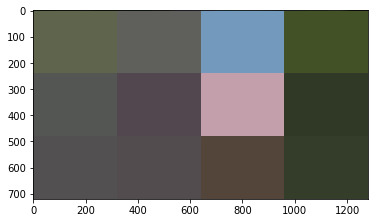

In [51]:
# Test with pixelwise closest color
#---------------------------------
def imgcrop(input, xPieces, yPieces):
    # Create figure and axes
    fig, ax = plt.subplots()
    filename, file_extension = os.path.splitext(input)
    im = Image.open(input)
    imgwidth, imgheight = im.size
    height = imgheight // yPieces
    width = imgwidth // xPieces
    colors = []
    for i in range(0, yPieces):
        for j in range(0, xPieces):
            box = (j * width, i * height, (j + 1) * width, (i + 1) * height)
            #print("box",box)
            a = im.crop(box)
            color = find_dominant_color_per_pixel(a)
            colors.append(color) 
            color = rgb2hex(color[0],color[1],color[2])
            rect = patches.Rectangle((j * width, i * height), width, height, linewidth=1, color=color)                   
            
            # Add the patch to the Axes
            ax.add_patch(rect)
    #print(colors)
    out = list(sum(colors, ()))
    #print(out)
    # Display the image
    ax.imshow(im)
    plt.show()

            
imgcrop("shot01366_48_RKF.png",4,3)


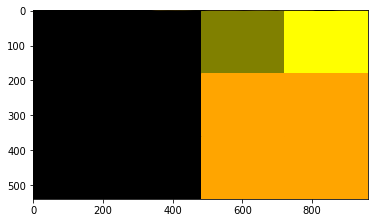

In [52]:
# Test with RGB closest color
#---------------------------------
image = "shot00309_89_RKF.png"
fig, ax = plt.subplots()
xPieces = 4
yPieces = 3
colors = []
im = Image.open(image) 
imgwidth, imgheight = im.size
height = imgheight // yPieces
width = imgwidth // xPieces
for i in range(0, yPieces):
    for j in range(0, xPieces):
        box = (j * width, i * height, (j + 1) * width, (i + 1) * height)
        a = im.crop(box)
        color = find_dominant_color(a)
        colors.append(color)
        color = rgb2hex(color[0],color[1],color[2])
        rect = patches.Rectangle((j * width, i * height), width, height, linewidth=1, color=color)   
        # Add the patch to the Axes
        ax.add_patch(rect)
color_list = list(sum(colors, ()))
    #print(colors)
out = color_list

# Display the image
ax.imshow(im)
plt.show()